<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [7]:
## Write your code here
df_duplicated = df[df.duplicated()]
df_duplicated
df_cleaned = df.drop_duplicates()

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [9]:
## Write your code here
missing_counts = df['CodingActivities'].isnull().sum()
missing_counts

np.int64(10971)

##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [11]:
## Write your code here
df['CodingActivities'].ffill()

0                                                    Hobby
1        Hobby;Contribute to open-source projects;Other...
2        Hobby;Contribute to open-source projects;Other...
3        Hobby;Contribute to open-source projects;Other...
4        Hobby;Contribute to open-source projects;Other...
                               ...                        
65432                        Hobby;School or academic work
65433             Hobby;Contribute to open-source projects
65434                                                Hobby
65435    Hobby;Contribute to open-source projects;Profe...
65436    Hobby;Contribute to open-source projects;Profe...
Name: CodingActivities, Length: 65437, dtype: object

**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [12]:
# Check columns containing 'Comp' or 'Salary'
comp_columns = [col for col in df.columns if 'Comp' in col or 'Salary' in col]
print("Compensation-related columns:", comp_columns)


Compensation-related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [15]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 146.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 208.1 MB/s eta 0:00:00


In [16]:
## Write your code here
import sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['ConvertedCompYearly_Normalized'] = scaler.fit_transform(df[['ConvertedCompYearly']])

df[['ConvertedCompYearly', 'ConvertedCompYearly_Normalized']].head()


,ConvertedCompYearly,ConvertedCompYearly_Normalized
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [17]:
## Write your code here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['ConvertedCompYearly_Standardized'] = scaler.fit_transform(df[['ConvertedCompYearly']])

df[['ConvertedCompYearly', 'ConvertedCompYearly_Standardized']].head()


,ConvertedCompYearly,ConvertedCompYearly_Standardized
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


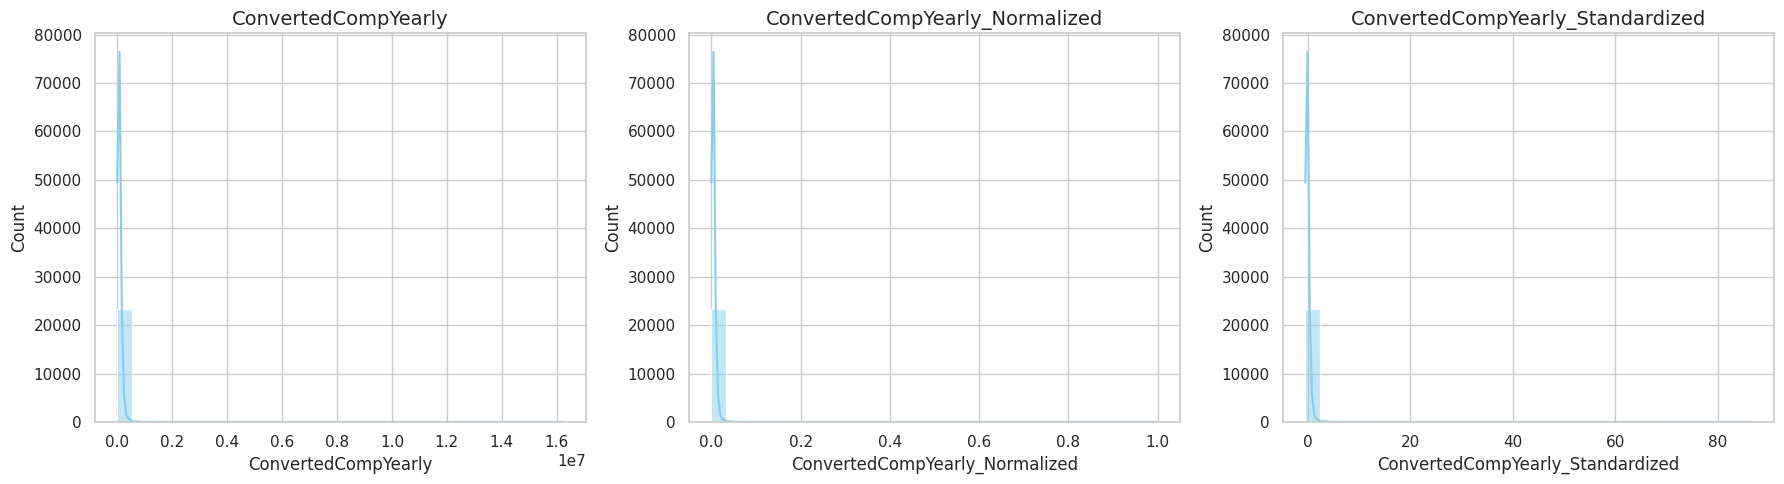

In [18]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Columns to visualize
cols = ['ConvertedCompYearly', 
        'ConvertedCompYearly_Normalized', 
        'ConvertedCompYearly_Standardized']

plt.figure(figsize=(18, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(col, fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
